In [1]:
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
import torch.utils.data
import torchvision
import torchvision.transforms

from dwt_transform import DWT2Numpy
from network import Net, run

In [15]:
training_data = torchvision.datasets.KMNIST(
    root="../data",
    train=True,
    download=True,
    transform=torchvision.transforms.Compose(
        [
            # DWT2Numpy("haar"),
            torchvision.transforms.ToTensor(),
            # torchvision.transforms.Normalize((0.5,), (0.5)),
        ]
    ),
)


test_data = torchvision.datasets.KMNIST(
    root="../data",
    train=False,
    download=True,
    transform=torchvision.transforms.Compose(
        [
            DWT2Numpy("haar"),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
)


batch_size = 64

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

device = "cuda" if torch.cuda.is_available() else "cpu"

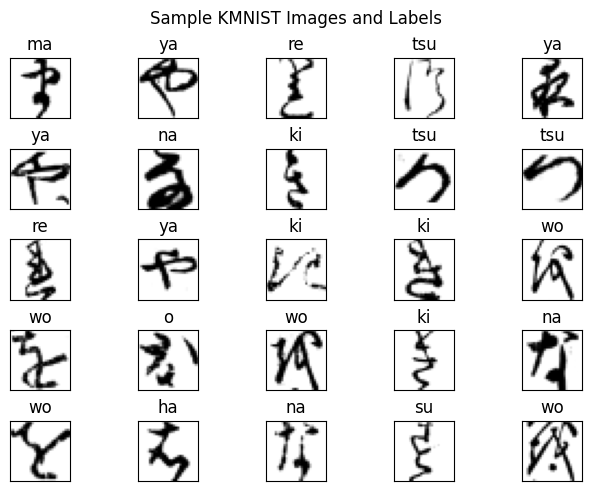

In [13]:
rand_idxs = torch.randint(0, len(training_data), (25,))
plt.subplots(5, 5, layout="constrained")
plt.suptitle("Sample KMNIST Images and Labels")
for i, idx in enumerate(rand_idxs):
    im, lab = training_data[idx]
    ax = plt.subplot(5, 5, i+1)
    ax.imshow(torchvision.transforms.ToPILImage()(im), cmap="binary")
    ax.set_title(training_data.classes[lab])
    ax.tick_params(left=None, labelleft=None, bottom=None, labelbottom=None)
plt.show()

In [17]:
net = Net(
    conv_layers=((16, 3), (64, 3),), # (64, 2),), # (96, 3), (96, 2)),
    linear_layers=(300, 200, 100),
    output_size=49,
    output_activation=lambda x: torch.log_softmax(x, dim=1),
)
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_fn = nn.NLLLoss()

In [18]:
run(train_dataloader, test_dataloader, net, loss_fn, optimizer, device, 10)

Epoch 1
-------------------------------
loss: 7.170686  [    0/60000]
loss: 0.805779  [ 6400/60000]
loss: 0.304401  [12800/60000]
loss: 0.356096  [19200/60000]
loss: 0.148978  [25600/60000]
loss: 0.240082  [32000/60000]
loss: 0.168698  [38400/60000]
loss: 0.188232  [44800/60000]
loss: 0.219098  [51200/60000]
loss: 0.069915  [57600/60000]
Test Error: 
 Accuracy: 86.6%, Avg loss: 0.448017 

Epoch 2
-------------------------------
loss: 0.111326  [    0/60000]
loss: 0.116252  [ 6400/60000]
loss: 0.071748  [12800/60000]
loss: 0.207402  [19200/60000]
loss: 0.177772  [25600/60000]
loss: 0.037627  [32000/60000]
loss: 0.185592  [38400/60000]
loss: 0.168734  [44800/60000]
loss: 0.124532  [51200/60000]
loss: 0.044117  [57600/60000]
Test Error: 
 Accuracy: 89.4%, Avg loss: 0.382605 

Epoch 3
-------------------------------
loss: 0.132838  [    0/60000]
loss: 0.119278  [ 6400/60000]
loss: 0.019204  [12800/60000]
loss: 0.032650  [19200/60000]
loss: 0.227937  [25600/60000]
loss: 0.045691  [32000/600